In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import re
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("IMDB-Movie-Data.csv")
df.shape

(1000, 12)

In [4]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
df2 = df[["Description","Genre"]]
df2

,Description,Genre
0,A group of intergalactic criminals are forced ...,"Action,Adventure,Sci-Fi"
1,"Following clues to the origin of mankind, a te...","Adventure,Mystery,Sci-Fi"
2,Three girls are kidnapped by a man with a diag...,"Horror,Thriller"
3,"In a city of humanoid animals, a hustling thea...","Animation,Comedy,Family"
4,A secret government agency recruits some of th...,"Action,Adventure,Fantasy"
...,...,...
995,"A tight-knit team of rising investigators, alo...","Crime,Drama,Mystery"
996,Three American college students studying abroa...,Horror
997,Romantic sparks occur between two dance studen...,"Drama,Music,Romance"
998,A pair of friends embark on a mission to reuni...,"Adventure,Comedy"


In [6]:
sample = df2["Genre"][0].split(",")
sample[0]

'Action'

In [7]:
df2.isnull().sum()

Description    0
Genre          0
dtype: int64

In [8]:

def genre(df2):
    for i in range(0,len(df2)):
        df2["Genre"][i]= df2["Genre"][i].split(",")[0]
    return df2.head()
genre(df2)

,Description,Genre
0,A group of intergalactic criminals are forced ...,Action
1,"Following clues to the origin of mankind, a te...",Adventure
2,Three girls are kidnapped by a man with a diag...,Horror
3,"In a city of humanoid animals, a hustling thea...",Animation
4,A secret government agency recruits some of th...,Action


In [9]:
import nltk

<AxesSubplot:>

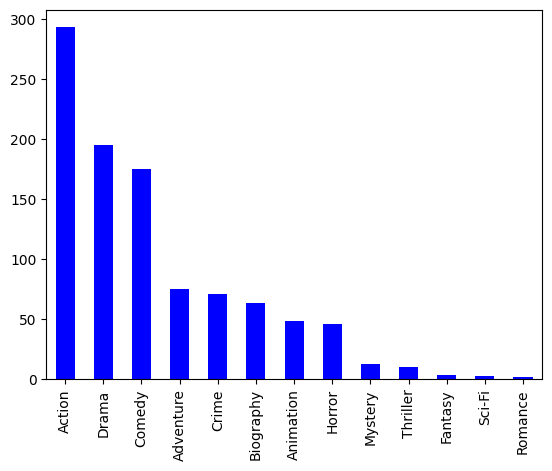

In [10]:
df2.Genre.value_counts().plot.bar(color="blue")

In [11]:
df2.Genre.unique()

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy'], dtype=object)

In [12]:
genres = {'Action':1,
          'Adventure':2,
          'Horror':3,
          'Animation':4,
          'Comidy':5,
          'Biography':6,
          'Drama':7,
          'Crime':8,
          'Romance':9,
          'Mystery':10,
          'Thriller':11,
          'Sci-Fi':12,
          'Fantasy':13}
df2["Genre"] = df2["Genre"].map(genres)
df2.head()

,Description,Genre
0,A group of intergalactic criminals are forced ...,1.0
1,"Following clues to the origin of mankind, a te...",2.0
2,Three girls are kidnapped by a man with a diag...,3.0
3,"In a city of humanoid animals, a hustling thea...",4.0
4,A secret government agency recruits some of th...,1.0


In [13]:
df2.dtypes

Description     object
Genre          float64
dtype: object

In [14]:
df2["Genre"] = df2["Genre"].fillna(1)
df2.isnull().sum()

Description    0
Genre          0
dtype: int64

In [15]:
df2["Genre"] = df2["Genre"].astype("int64")
df2.dtypes

Description    object
Genre           int64
dtype: object

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
main_list=[]
for i in range(0,df2.shape[0]):
    re_ = re.sub("[^a-zA-Z]"," ",df2["Description"][i])
    re_ = re_.lower()
    split_ = re_.split()
    stp_words = [word for word in split_ if word not in set(stopwords.words("english"))]
    ps = PorterStemmer()
    stem_ = [ps.stem(word) for word in stp_words]
    main_list.append(" ".join(stem_))
print( main_list)

['group intergalact crimin forc work togeth stop fanat warrior take control univers', 'follow clue origin mankind team find structur distant moon soon realiz alon', 'three girl kidnap man diagnos distinct person must tri escap appar emerg fright new th', 'citi humanoid anim hustl theater impresario attempt save theater sing competit becom grander anticip even finalist find live never', 'secret govern agenc recruit danger incarcer super villain form defens task forc first mission save world apocalyps', 'european mercenari search black powder becom embroil defens great wall china hord monstrou creatur', 'jazz pianist fall aspir actress lo angel', 'actor best known play titl charact detect seri mindhorn must work polic serial killer say speak detect mindhorn believ real person', 'true life drama center british explor col perciv fawcett disappear search mysteri citi amazon', 'spacecraft travel distant coloni planet transport thousand peopl malfunct sleep chamber result two passeng awaken y

In [18]:
for i in range(0,len(main_list)):
    main_list[i] = re.sub(","," ",main_list[i])    
print(main_list[0])                 

group intergalact crimin forc work togeth stop fanat warrior take control univers


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 70,ngram_range=(1,2))
X = cv.fit_transform(main_list).toarray()
y=df2.Genre
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

clas = Naive(X_train,y_train)
clas.fit(X_train,y_train)
clas.predict(X_test[:10])

array([1, 1, 1, 1, 7, 7, 7, 1, 7, 1], dtype=int64)

[[71  2  0  0  0 17  0  0  0  0  0]
 [11  1  0  0  0  1  0  0  0  0  0]
 [ 4  1  1  0  0  1  1  0  0  0  0]
 [ 8  0  0  0  0  4  0  0  0  0  0]
 [10  0  0  0  3  0  0  0  0  0  0]
 [22  2  1  0  3 17  1  0  0  0  0]
 [ 7  0  0  0  0  2  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]]


<AxesSubplot:>

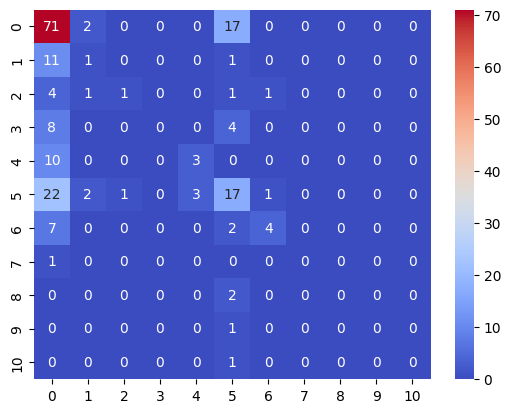

In [20]:
pred = clas.predict(X_test)
cm =  confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,
            cbar=True,
            cmap="coolwarm")

In [21]:
pickle.dump(cv,open("imdb.pkl","wb"))
pickle.dump(clas,open("genre.pkl","wb"))